## Метрики оценки качества работы искусственной нейронной сети

## Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является accuracy — доля правильных ответов алгоритма.

$$ \large Accuracy = \frac{P}{N}, $$

где $P$ — количество верно предсказанных классов,

$\quad\  N$ — общее количество тестовых примеров.

In [93]:
from sklearn.metrics import accuracy_score


y_targ = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred = [1, 0, 0, 0, 1, 2, 0, 2, 2]

accuracy_score(y_targ, y_pred)

0.5555555555555556

**Какие есть недостатки у такого способа подсчёта?**

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/problem_of_simple_way_to_compute_accuracy.png" width="600" >

Accuracy нельзя использовать, если **данные не сбалансированы**. То есть в одном из классов больше представителей, чем в другом.

На рисунке выше мы видим, что при явном количественном преобладании объектов класса airplane модель может классифицировать все объекты как airplane и при этом получить такую же точность, как модель, которая учит все 3 класса, так как количество ошибок будет равно числу объектов классов, в которых меньше представителей (в данном случае в классах automobile и bird по 10 представителей, соответсвенно, 20 ошибок).

Также она не подойдет для задач сегментации и детектирования: если требуется не только определить наличие объекта на изображении, но и найти место, где он находится, то весьма желательно учитывать разницу в координатах.

Для решения этой проблемы вводятся метрики "точность" и "полнота"

## Precision, Recall

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики **precision (точность)** и **recall (полнота)**.


$\large precision = \frac{TP}{TP + FP}$


$\large recall = \frac{TP}{TP + FN}$

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

<img src ="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" width="600">

Для численного описания этих метрик необходимо ввести важную концепцию для описания в терминах ошибок классификации — **confusion matrix** (матрица ошибок).
Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:


|      |$\large y=1$  |$\large y=0$   |
| ---  |---  |---   |
| $\large \widehat{y}=1$    |$\large True Positive (TP) $   | $\large False Positive (FP)   $  |
| $\large \widehat{y}=0$    |$\large False Negative (FN)$   | $\large True Negative (TN)     $ |

Пример классификатора, способного проводить различие между всего лишь двумя классами, "пятерка" и "не пятерка" из набора рукописных цифр MNIST. Ниэе приведён код для матрицы ошибок:

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5) # True для всех пятерок, False для в сех остальных цифр. Задача опознать пятерки
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42) # классификатор на основе метода стохастического градиентного спуска (англ. Stochastic Gradient Descent SGD)

sgd_clf.fit(X_train, y_train_5) # обучаем классификатор распозновать пятерки на целом обучающем наборе
# Для расчета матрицы ошибок сначала понадобится иметь набор прогнозов, чтобы их можно было сравнивать с фактическими целями

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(confusion_matrix(y_train_5, y_train_pred))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Именно** введение **precision** не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. **Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.**

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/precision-recall.png" width="800" >

**Accuracy**

Accuracy также можно посчитать через матрицу ошибок.

$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


**Balanced accuracy**

В случае дисбаланса классов есть специальный аналог точности – сбалансированная точность.

$\ BA = \frac{R_1 + R_0}{2} = \frac{1}{2} (\frac{TP}{TP + FN} + \frac{TN}{TN + FP})$

Для сбалансированного и несбалансированного случаев она будет равна $0. 96$ и $0.33$ соответственно.

Для простоты запоминания – это среднее полноты всех классов.

### Задание: посчитать вручную метрики для полученной матрицы  array([[53892, 687], [ 1891, 3530]])

## F-мера

Ошибки классификации бывают двух видов: **False Positive** и **False Negative**. Первый вид ошибок называют **ошибкой I-го рода**, второй — **ошибкой II-го рода**. Пусть студент приходит на экзамен. Если он учил и знает, то принадлежит классу с меткой 1, иначе — имеет метку 0 (знающего студента называем «положительным»). Пусть экзаменатор выполняет роль классификатора: ставит зачёт (т.е. метку 1) или отправляет на пересдачу (метку 0). Самое желаемое для студента «не учил, но сдал» соответствует ошибке 1 рода, вторая возможная ошибка «учил, но не сдал» – 2 рода.




<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/1_2_errors.png" width="600" >

Часто в реальной практике стоит задача найти **оптимальный** **баланс** между **Presicion и Recall**. Классическим примером является задача определения оттока клиентов.

**F-мера** (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :

$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$


$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$).
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.



Сбалансированная F-мера, $β=1$:

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/f1_balanced.png" width="500" >

При перекосе в точность ($β=1/4$):

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/f1_unbalanced.png" width="500" >

Более наглядно: низкие значения точности не позволяют метрике F вырасти.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/f1_lines.png" width="600" >

<center><em>Зависимость F1-меры от полноты при фиксированной точности. При точности 10% F1-мера не может быть больше 20%.</em></center>


В sklearn есть удобная функция **sklearn.metrics.classification_report**, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.

In [25]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ["class 0", "class 1", "class 2"]
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## Задание. Посчитать отдельно метрики precision, recall, f1-score для нейронной сети из прошлого задания для набора данных MNIST

In [95]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

model = NeuralNetwork()
model.load_state_dict(torch.load("model_weights.pth"))
#print(list(model.parameters()))

<All keys matched successfully>

In [106]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from IPython.display import clear_output
from torch.utils.data import DataLoader

train_data = datasets.MNIST(
    root="./MNIST", train=True, download=True, transform=ToTensor()
)

test_data = datasets.MNIST(
    root="./MNIST", train=False, download=True, transform=ToTensor()
)


train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

imgs, labels = next(iter(test_dataloader))
pred = model(torch.reshape(imgs, (64, 28, 28)).to(device))

pred = pred.detach()
digits = np.argmax(pred.cpu().numpy(), axis=1)

y_true = digits
y_pred = [labels[i].item() for i in range(len(labels))]
target_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

Using cpu device


### Accuracy:

In [107]:
## WRITE YOUR CODE HERE

0.90625
58


### Precision:

In [108]:
## WRITE YOUR CODE HERE

[1.         0.9        1.         0.83333333 0.9        0.85714286
 0.8        1.         1.         0.85714286]


### Recall:

In [101]:
## WRITE YOUR CODE HERE

[1.         1.         0.71428571 0.83333333 0.9        1.
 0.66666667 1.         1.         1.        ]


### Classification report:

In [104]:
## WRITE YOUR CODE HERE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.90      1.00      0.95         9
           2       1.00      0.71      0.83         7
           3       0.83      0.83      0.83         6
           4       0.90      0.90      0.90        10
           5       0.86      1.00      0.92         6
           6       0.80      0.67      0.73         6
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         1
           9       0.86      1.00      0.92         6

    accuracy                           0.91        64
   macro avg       0.91      0.91      0.91        64
weighted avg       0.91      0.91      0.90        64



### Многоклассовый случай

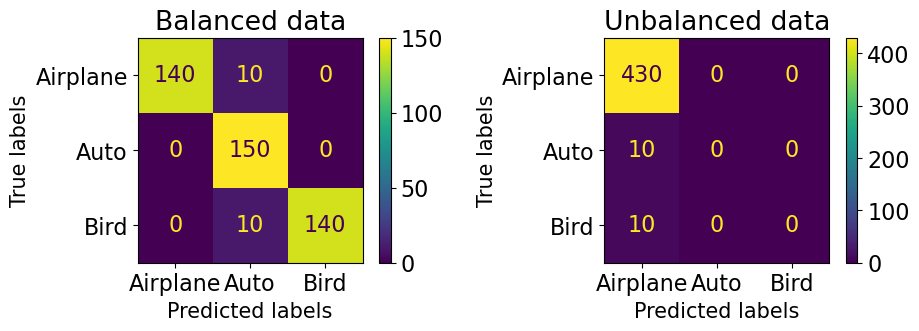

Accuracy Balanced   Data: 0.96
Accuracy Unbalanced Data: 0.96


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3.0)
plt.rcParams.update({"font.size": 16})
# font = {'size':'21'}
ax[0].set_title("Balanced data")
ax[1].set_title("Unbalanced data")

labels = ["Airplane", "Auto", "Bird"]

# Balanced data
air, auto, bird = 150, 150, 150
actual_b = np.array([0] * air + [1] * auto + [2] * bird)
predicted_b = np.array([0] * (air - 10) + [1] * (auto + 20) + [2] * (bird - 10))

# Unbalanced data
air, auto, bird = 430, 10, 10
actual_ub = np.array([0] * air + [1] * auto + [2] * bird)
predicted_ub = np.array([0] * (air + 20) + [1] * (auto - 10) + [2] * (bird - 10))

# Balanced data
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(## WRITE YOUR CODE HERE),
    display_labels=labels,
).plot(ax=ax[0])

# Unbalanced data
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(## WRITE YOUR CODE HERE),
    display_labels=labels,
).plot(ax=ax[1])

label_font = {"size": "15"}  # Adjust to fit
ax[0].set_xlabel("Predicted labels", fontdict=label_font)
ax[0].set_ylabel("True labels", fontdict=label_font)
ax[1].set_xlabel("Predicted labels", fontdict=label_font)
ax[1].set_ylabel("True labels", fontdict=label_font)

plt.show()

print(
    "Accuracy Balanced   Data:", round(metrics.accuracy_score(## WRITE YOUR CODE HERE), 2)
)
print(
    "Accuracy Unbalanced Data:",
    round(metrics.accuracy_score(## WRITE YOUR CODE HERE), 2),
)

In [29]:
print(
    "Balanced accuracy for Balanced data  :",
    round(metrics.balanced_accuracy_score(## WRITE YOUR CODE HERE), 2),
)
print(
    "Balanced accuracy for Unbalanced data :",
    round(metrics.balanced_accuracy_score(## WRITE YOUR CODE HERE), 2),
)

Balanced accuracy for Balanced data  : 0.96
Balanced accuracy for Unbalanced data : 0.33


**Multiclass Accuracy**


В случае многоклассовой классификации термины TP, FP, TN, FN считаются для каждого класса:

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/confmatrix.png" width="600" >\

$\displaystyle \large Multiclass Accuracy = \frac{1}{n}\sum_{i=1}^{n} [actual_{i}==predicted_{i}]  =   \frac{\sum_{k=1}^{N} TP_{Ck} }{\sum_{k=1}^{N} (TP_{Ck} + TN_{Ck} + FP_{Ck} + FN_{Ck})}$

## AUC-ROC

ROC = receiver operating characteristic, AUC = area under the curve

Пусть решается задача бинарной классификации, и необходимо оценить важность признака $j$ для решения именно этой задачи. В этом случае можно попробовать построить классификатор, который использует лишь этот один признак $j$, и оценить его качество. Например, можно рассмотреть очень простой классификатор, который берёт значение признака $j$ на объекте, сравнивает его с порогом $t$, и если значение больше этого порога, то он относит объект к первому классу, если же меньше порога — то к другому, нулевому или минус первому, в зависимости от того, как мы его обозначили. Далее, поскольку этот классификатор зависит от порога $t$, то его качество можно измерить с помощью таких метрик, как площадь под ROC-кривой или Precision-Recall кривой, а затем по данной площади отсортировать все признаки и выбрать лучшие.

Но вначале разберёмся, что такое **AUC-ROC**.

### Построение

ROC-кривой (ROC, receiver operating characteristic, кривой ошибок) традиционно называют график кривой, которая характеризует качество предсказаний бинарного классификатора на некоторой фиксированной выборке при всех значениях порога классификации. Площадь под графиком ROC-кривой AUC (area under the curve) является численной характеристикой качества классификатора. Определим, как именно строится ROC-кривая, через рассмотрение примера.

Вывод некоторого бинарного классификатора представлен в табл. 1. Упорядочим строки данной таблицы по убыванию значения вывода нашего бинарного классификатора и запишем результат в табл. 2. Если наш алгоритм справился с задачей классификации, то мы увидим в последней колонке также упорядоченные по убыванию значения (или случайное распределение меток 0 и 1 в противном случае).

<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/roc_auc_data_example.png" alt="alttext" width=600/></center>

Приступим непосредственно к изображению графика ROC-кривой. Начнём с квадрата единичной площади и изобразим на нём прямоугольную координатную сетку, равномерно нанеся $m$ горизонтальных линий и $n$ вертикальных. Число горизонтальных линий $m$ соответствует количеству объектов класса $1$ из рассматриваемой выборки, а число $n$ — количеству объектов класса $0$. В нашем примере $m=3$ и $n=4$. Таким образом, квадрат единичной площади разбился на $m \times n$ прямоугольных блоков (на $12$ штук согласно нашему примеру).

Начиная из точки $(0, 0)$, построим ломаную линию в точку $(1, 1)$ по узлам получившейся решетки по следующему алгоритму:
- рассмотрим последовательно все строки табл. 2
- оценка алгоритма для объекта из текущей строки не равна оценке для объекта из следующей:
- - если в строке содержится объект с меткой класса $1$, рисуем линию до следующего узла вертикально вверх
- - если в строке содержится объект с меткой класса $0$, рисуем линию до следующего узла горизонтально направо
- оценки для объектов в нескольких последующих строках совпадают:
- - нарисовать линию из текущего узла в узел, располагающийся на $k$ углов вертикально выше и на $l$ узлов левее. $k$ и $l$ соответственно равны количеству объектов класса $1$ и $0$ среди группы повторяющихся значений оценок классификатора

(всего потребуется не более $n + m$ шагов — столько же, сколько строк в нашей таблице)

<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/make_roc_curve.png" alt="alttext" width=500/></center>

<center><em>Рис.1. Построение ROC-кривой.</em></center>

Справа на рис. 1 показана полученная для нашего примера кривая – эта изображенная на единичном квадрате ломанная линия и называется ROC-кривой.

Вычислим площадь под получившийся кривой — **AUC-ROC**. В нашем примере AUC-ROC $= 9.5 / 12 ~ 0.79$, и именно это значение является искомой метрикой качества работы нашего бинарного классификатора.
(Так как мы начали свое построение с квадрата единичной площади, то AUC-ROC может принимать значения в $[0,1]$)


1. ROC-кривая абсолютно точного бинарного классификатора имеет вид $(0,0) \rightarrow (1,0) \rightarrow (1,1)$. ROC-AUC для такого идеального классификатора равен площади всего единичного квадрата.
2. ROC-кривая для всегда ошибающегося бинарного классификатора имеет вид $(0,0) \rightarrow (0,1) \rightarrow (1,1)$. ROC-AUC в этом случае равен нулю.
3. Если наш бинарный классификатор для всех объектов предскажет одно и то же значение, то его ROC-кривая будет иметь вид $(0,0) \rightarrow (1,1)$


<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/various_roc_curves.png" alt="alttext" width=500/></center>

<center><em>Рис. 2. ROC-кривые для наилучшего (AUC=1), константного (AUC=0.5) и наихудшего (AUC=0) алгоритма.</em></center>


### Смысл метрики

Как можно заметить на рис. 3, координатная сетка, описанная в нашем алгоритме построения ROC кривой, разбила единичный квадрат на столько прямоугольников, сколько существовало пар объектов класс-$0$ — класс-$1$ в исследуемой выборке данных. Если теперь посчитать количество оказавшихся под ROC-кривой прямоугольников, то можно заметить, что оно в точности равно числу верно классифицированных алгоритмом пар объектов, то есть таких пар объектов противоположных классов, для которых алгоритм поставил большую по величине оценку для объекта класса $1$.

<center><img src="https://edunet.kea.su/repo/EduNet-content/L01/out/roc_auc_pairs_descripton.png" alt="alttext" width=200/></center>

<center><em>Рис. 3. Каждый блок соответствует паре объектов.</em></center>

Таким образом, **ROC-AUC равен части верно упорядоченных оценкой классификатора пар объектов противоположных классов (в которой объект класса $0$ получил оценку исследуемым классификатором ниже, чем объект класса $1$)**. Это явно записывается формулой:


$$\text{ROC-AUC} = \frac{\sum_{i=1}^{N} \sum_{j=1}^{N} I[y_{i} < y_{j}]I'[a_{i} < a_{j}] } {\sum_{i=1}^{N} \sum_{j=1}^{N} I[y_{i} < y_{j}]} $$


\begin{equation*}
I'[a_{i}< a_{j}] =
 \begin{cases}
   0, & \quad a_{i} > a_{j},
   \\
   0.5, & \quad a_{i} = a_{j},
   \\
   1, & \quad a_{i} < a_{j}.
 \end{cases}
\end{equation*}

\begin{equation*}
I[y_{i}< y_{j}] =
 \begin{cases}
   0, & \quad y_{i} \geq y_{j},
   \\
   1, & \quad y_{i} < y_{j}.
 \end{cases}
\end{equation*}

$ a_{i} $ — выходное значение классификатора на $i$-м  объекте, $ y_{i} $ — априорно верная метка класса для того же объекта, $N$ — полное число объектов.

Данное определение можно обобщить на задачу классификации непрерывного множества объектов. Пусть мы взяли два случайных объекта разных классов: $x_i$ класса $0$ и $x_j$, принадлежащий классу $1$. Тогда метрика ROC-AUC равна вероятности того, что в такой паре объектов объект класса $1$ получил оценку выше, нежели объект класса $0$:

$$\text{ROC-AUC}(a) = P(a(x_i) < a(x_j) | y_i=0, y_j=1)$$

## Построение ROC-кривой для бинарного классификатора.

Подключим необходимые библиотеки.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Создадим синтетический набор данных. Сгененируем 1й класс из нормального распределения.

In [143]:
class1_x = np.random.normal(loc = 10, scale = 5, size = 500)
class1_y = np.random.normal(loc = 1, scale = 5, size = 500)

Создадим 2й класс с дисперсией 5, размерности 500 и математическим ожиданием 1 и 5 соответственно:

In [145]:
class2_x = ## WRITE YOUR CODE HERE
class2_y = ## WRITE YOUR CODE HERE

Нарисуем полученные значения на плоскости.

<Axes: >

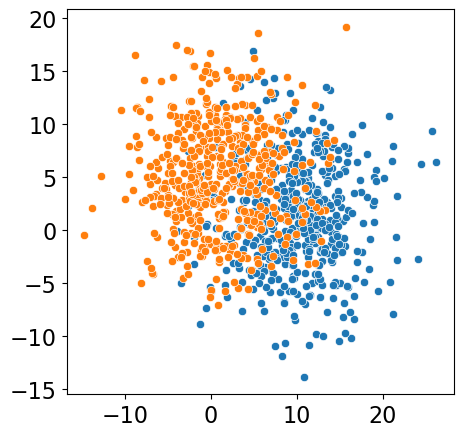

In [146]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = class1_x, y = class1_y)
sns.scatterplot(x = class2_x, y = class2_y)

Переведём оба класса в многомерные массивы (dataframe).

In [147]:
df_class1 = ## WRITE YOUR CODE HERE
df_class1['x'] = class1_x
df_class1['y'] = class1_y
df_class1['class'] = 0

In [148]:
df_class2 = ## WRITE YOUR CODE HERE
df_class2['x'] = ## WRITE YOUR CODE HERE
df_class2['y'] = ## WRITE YOUR CODE HERE
df_class2['class'] = ## WRITE YOUR CODE HERE

И соединим их в один большой массив данных.

In [149]:
df = ## WRITE YOUR CODE HERE

Разделим переменные на независимые и зависимые.

In [150]:
X = df.drop(columns = ['class'])
y = df['class']

Разделим данные на тренировочные и тестовые в соотношении 1 к 3.

In [151]:
X_train, X_test, y_train, y_test = ## WRITE YOUR CODE HERE

Выберем простой наивный байесовский классификатор ([статья в Википедии](https://ru.wikipedia.org/wiki/Наивный_байесовский_классификатор), [код реализации применения алгоритма для отслеживания спама](https://github.com/makispl/SMS-Spam-Filter-Naive-Bayes/blob/master/SMS_Spam_Filtering_Naive_Bayes.ipynb)).

In [152]:
from sklearn.naive_bayes import GaussianNB

Создадим объект модели.

In [154]:
model = ## WRITE YOUR CODE HERE

Подадим модели на вход тренировочные данные.

In [1]:
## WRITE YOUR CODE HERE

Выведем предсказания на тестовых данных.

In [156]:
y_pred = ## WRITE YOUR CODE HERE

Выведем первые 10 выходов.

In [157]:
## WRITE YOUR CODE HERE

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

Предскажем классы для тестовых данных и вернём вероятности для каждого класса:

In [158]:
y_proba = ## WRITE YOUR CODE HERE

Посмотрим на первые 10 выходных значений.

In [159]:
## WRITE YOUR CODE HERE

array([[0.94010383, 0.05989617],
       [0.9780766 , 0.0219234 ],
       [0.57076632, 0.42923368],
       [0.0833947 , 0.9166053 ],
       [0.69154875, 0.30845125],
       [0.95052219, 0.04947781],
       [0.02881159, 0.97118841],
       [0.04232457, 0.95767543],
       [0.33876851, 0.66123149],
       [0.91178948, 0.08821052]])

Выведем полученные значения в виде графика на экран.

<Axes: xlabel='x', ylabel='y'>

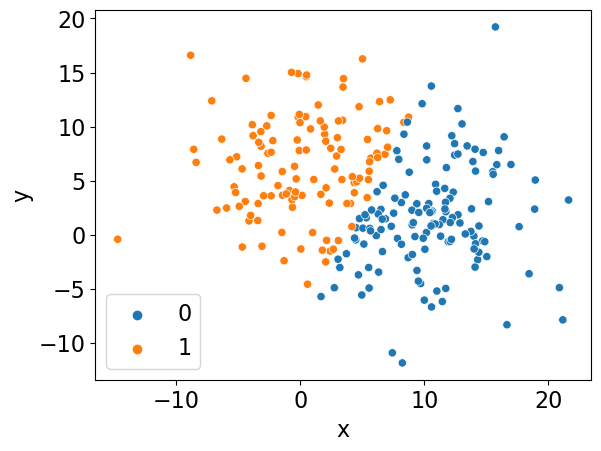

In [160]:
sns.scatterplot(x = X_test['x'], y = X_test['y'], hue = y_pred)

Построим ROC-кривую. Для этого сначала импортируем confusion_matrix, введём функци для посчёта её значений и явного выделения TN, FP, FN, TP. Результатом функции будут true positive rate и false positive rate.

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Посчитать confusion matrix и явно выделить значения
    cm = ## WRITE YOUR CODE HERE
    TN = ## WRITE YOUR CODE HERE
    FP = ## WRITE YOUR CODE HERE
    FN = ## WRITE YOUR CODE HERE
    TP = ## WRITE YOUR CODE HERE
    
    # Посчитать tpr (sensitivity - true positive rate) и fpr (1-specificity - false positive rate)
    tpr =  ## WRITE YOUR CODE HERE
    fpr = ## WRITE YOUR CODE HERE
    
    return ## WRITE YOUR CODE HERE

Построим функцию для выделения координат точек ROC-кривой.

In [163]:
def get_n_roc_coordinates(y_real, y_proba, resolution = 50):
    '''
    Calculates "n" ROC Curve coordinates (tpr and fpr) by manipulating the threshold used to predict the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        resolution: Defines how many divisions the threshold will have, and how many coordinates will be calculated (default = 50).
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(resolution):
        threshold = i/resolution
        y_pred = y_proba[:, 1] > threshold
        tpr, fpr = ## WRITE YOUR CODE HERE
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

Создадим отдельно функцию для непосредственного вывода графика на экран.

In [164]:
def plot_roc_curve(tpr, fpr, scatter = True):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    plt.figure(figsize = (5, 5))
    if scatter:
        sns.scatterplot(x = fpr, y = tpr)
    sns.lineplot(x = fpr, y = tpr)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

Теперь получите ROC-кривую для 10 точек. 

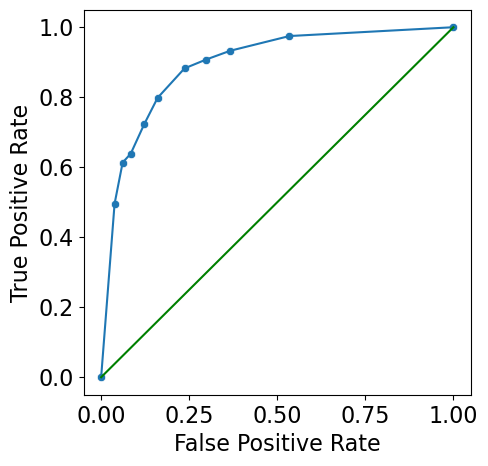

In [165]:
tpr, fpr = ## WRITE YOUR CODE HERE

plot_roc_curve(tpr, fpr)

Построение ROC-кривой с использованием библиотеки Sklearn

In [166]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [167]:
def plot_sklearn_roc_curve(y_real, y_pred):
    '''
    Plots the ROC Curve with the sklearn methods by using the real observations and their predictions.
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
    '''
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


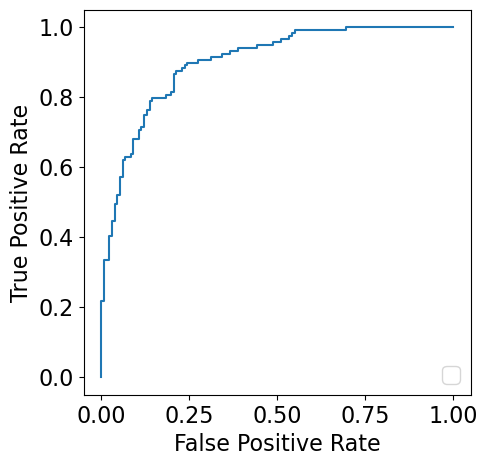

In [175]:
# Plots the ROC curve using the sklearn methods
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

Выведем все метрики для данной модели.

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [180]:
def evaluate_classifier(y_real, y_pred):
    '''
    Prints the accuracy, precision, recall and roc auc scores for the classifier.
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
    '''
    print(f"Accuracy: {accuracy_score(## WRITE YOUR CODE HERE):.4f}")
    print(f"Precision: {precision_score(y_real, y_pred):.4f}")
    print(f"Recall: {recall_score(y_real, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_real, y_pred):.4f}")

In [181]:
evaluate_classifier(## WRITE YOUR CODE HERE)

Accuracy: 0.8200
Precision: 0.8190
Recall: 0.7983
ROC AUC: 0.8190


## Построение ROC-кривой для многоклассового случая.

Загружаем необходимые библиотеки.

In [182]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

Загрузить набо данных The Iris Dataset, выделить непосредственно данные и целевые метки.

In [183]:
iris = ## WRITE YOUR CODE HERE
X = ## WRITE YOUR CODE HERE
y = ## WRITE YOUR CODE HERE

Перевести метки классов в трехмерный вектор принадлежности каждого класса при помощи функции label_binarize.

In [184]:
y = ## WRITE YOUR CODE HERE
n_classes = y.shape[1]

Разделить данные на тренировочную и тестовую части в равных долях.

In [185]:
X_train, X_test, y_train, y_test = ## WRITE YOUR CODE HERE

Применим алгоритм One-vs-the-rest (OvR) multiclass strategy.

In [186]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(## WRITE YOUR CODE HERE).decision_function(X_test)

Построим ROC-кривые для каждого класса и выведем значение площади под каждой кривой.

In [2]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

NameError: name 'n_classes' is not defined

[Задачи от Александра Дьяконова на понимание логики ROC-AUC](https://alexanderdyakonov.wordpress.com/2015/10/09/задачки-про-auc-roc/)